In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math as math 

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import mutual_info_regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn import neighbors 
import sklearn.metrics as metrics




In [57]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data.head()


data_features = pd.DataFrame(data, columns = data.columns[:-1])
data_features= data.drop(['S.No','Age'], axis=1)

data.head()
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [12]:
dataDd = data.copy()
dataDd.drop_duplicates(inplace=True) #this function get rid of the duplicate if there are any in the dataset 
dataDd.shape #this function returns the shape of the array 

(4226, 141)

In [13]:
data=dataDd #replacing health data to healthDd data 
del dataDd #deleting healthDd  
data.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
0,1,22916.9,982.7,15196.7,55796.4,6855.5,2956.4,4240.7,2223.9,2034.4,...,2.408,2.629,3.519,2.009,2.825,2.33635,1093846,1619602.965,85,1
1,2,22953.2,984.5,15289.7,55778.6,6835.1,3064.2,4498.6,2354.1,1927.1,...,2.417,2.640,3.488,2.111,2.720,2.34202,1099876,1624755.130,85,1
2,3,23320.4,1062.1,15382.1,55551.2,7566.0,3231.7,4456.2,1995.4,2064.7,...,2.374,2.601,3.342,2.146,2.684,2.31982,1097999,1622609.518,86,1
3,4,24360.0,1000.5,14805.4,54041.8,8004.6,3137.3,4262.2,1983.4,2017.7,...,2.366,2.639,3.361,2.056,2.700,2.29215,1070117,1583854.236,87,1
4,5,25769.4,1124.4,16331.1,54108.6,6677.4,2964.4,4204.6,2409.7,2251.8,...,2.381,2.555,3.450,2.052,2.574,2.30397,1075926,1617375.362,89,1


In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data_features)
n = 30
pca = PCA(n_components=n)
pca_dataF = pca.fit_transform(x)

labels = data.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_insula_thickness  rhCerebralWhiteMatterVol      S.No  \
0                2.116693                  1.364192  1.509742   
1                1.781763                  1.577276  1.751911   
2                2.423064                  1.424486  1.583686   
3                4.657487                  1.366376  1.174583   
4                3.795704                  1.701513  2.226929   
...                   ...                       ...       ...   
4221             3.332053                  2.220377  0.517893   
4222             4.258130                 -2.535943  1.742708   
4223             7.826457                  2.169779  3.995974   
4224            -0.702317                  2.439427  7.148804   
4225            -2.373678                 -3.566135  2.435557   

      lh_lateraloccipital_thickness  rhSurfaceHoles  Optic-Chiasm  \
0                         -2.002547       -1.880995      2.278606   
1                         -1.118207       -1.487249

,rh_insula_thickness,rhCerebralWhiteMatterVol,S.No,lh_lateraloccipital_thickness,rhSurfaceHoles,Optic-Chiasm,rh_bankssts_thickness,Optic-Chiasm,Right-Thalamus,lh_middletemporal_thickness,...,lh_precuneus_thickness,Right-choroid-plexus,Right-choroid-plexus,Right-WM-hypointensities,rh_precuneus_thickness,Left-Cerebellum-White-Matter,lh_precuneus_thickness,lh_temporalpole_thickness,rh_frontalpole_thickness,rh_bankssts_thickness
0,2.116693,1.364192,1.509742,-2.002547,-1.880995,2.278606,-1.646300,-0.011330,-0.459902,1.800872,...,-0.422278,-0.105162,0.747861,0.247528,-1.572648,0.524016,-0.011988,0.307543,-0.426805,-0.229143
1,1.781763,1.577276,1.751911,-1.118207,-1.487249,2.077501,-1.812250,-0.369204,-0.918849,1.980609,...,0.169302,-0.027182,0.774726,0.186905,-1.660712,0.650243,0.270660,0.270478,-0.390153,0.055337
2,2.423064,1.424486,1.583686,-1.542398,-1.247237,1.774430,-2.453779,-0.634583,-1.262895,1.761288,...,-0.032230,0.338045,0.601288,0.000853,-1.678563,0.455414,0.357245,-0.083775,-0.142788,-0.142963
3,4.657487,1.366376,1.174583,-0.637339,-1.459941,2.256621,-1.237767,-0.935250,-1.093537,1.561650,...,-0.323545,0.429014,0.555494,-0.550396,-1.578926,0.621149,0.086465,0.583232,-0.038076,0.244896
4,3.795704,1.701513,2.226929,-1.242365,-1.389589,2.822711,-1.682757,-0.278114,-0.691466,1.798995,...,-0.096144,-0.116848,0.491955,-0.401563,-1.404124,0.752122,-0.515622,-0.075725,-0.586110,0.035086


In [59]:
#Training 

X_train, X_test, y_train, y_test = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)


X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.25, random_state=33)




In [60]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 9.135768394116797
RMSE value for k=  2 is: 7.90226263275153
RMSE value for k=  3 is: 7.343367920164525
RMSE value for k=  4 is: 7.189381419056805
RMSE value for k=  5 is: 7.019675851248673
RMSE value for k=  6 is: 7.059495590155247
RMSE value for k=  7 is: 6.955687898913578
RMSE value for k=  8 is: 6.863686016356814
RMSE value for k=  9 is: 6.928909248090491
RMSE value for k=  10 is: 6.927294252475304
RMSE value for k=  11 is: 7.0140366272355665
RMSE value for k=  12 is: 7.07952404045731
RMSE value for k=  13 is: 7.130026515133649
RMSE value for k=  14 is: 7.089891223878036
RMSE value for k=  15 is: 7.157847433007625
RMSE value for k=  16 is: 7.165717608470182
RMSE value for k=  17 is: 7.0937399472068075
RMSE value for k=  18 is: 7.067140409077205
RMSE value for k=  19 is: 7.105126152638438
RMSE value for k=  20 is: 7.18400591854822


<AxesSubplot:>

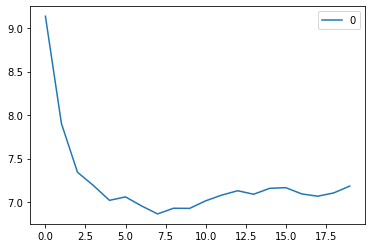

In [54]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

#From the plot K=10

In [61]:
kNN = neighbors.KNeighborsRegressor(10)

kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)

In [63]:

mean_qerror = metrics.mean_squared_error(y_test, y_pred)
root_mean_qerror = np.sqrt(mean_qerror)


print("R squared: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', +(np.sqrt(mean_qerror)))


R squared: 0.8789098904349077
Max Error: 19.700000000000003
Mean absolute error: 5.180660377358492
Mean squared error: 47.98740566037737
Root Mean Squared Error: 6.927294252475304


In [64]:
# rmse_val = [] # to store values for different k 

# n_components = range(1,20)

# train_accuracy = np.empty(len(n_components)
# validation_accuracy = np.empty(len(n_components))

# for K in range (n_components): 
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors=K)
    
#     model.fit(X_train, y_train)
       
#     y_pred_train = model.predict(X_train)
#     y_pred_validate = model.predict(X_validate)
    
#     train_accuracy[K] = metrics.mean_squared_error(y_train, y_pred_train)
#     validation_accuracy[K] =metrics.mean_squared_error(y_validate, y_pred_validate)

#     #error = np.sqrt(mean_squared_error(y_test,y_pred))

    
# plt.plot(n_components, validation_accuracy, label='Validation Set MSE')
# plt.plot(n_components, train_accuracy, label='Training Set MSE')

In [54]:
#X = data.drop('pca_df', axis=1)



In [ ]:
#predicting the accuracy score 

# acc_score = r2_score(y_test, y_prediction)

# print ('r2 score:', acc_score)

# mean_qerror = mean_square_error(y_test, y_prediction)

# print('mean square error:', mean_qerror)

# root_mean_qerror = np.sqrt(mean_qerror)

# print('root mean square error:', root_mean_qerror)

In [55]:
# from sklearn.linear_model import LogisticRegression 

# X = 

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = yr, shuffle = True, random_state =42)

# model = LogisticRegression()

# y_predict = model.predict(X_test)

# train_Acc = model.score(X_train, y_train)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, stratify = y, shuffle = True, random_state = 42)



# #creating the linear regression 
# model = LinearRegression().fit(X_train,y_train)

# #predicting the outcome based on the regression model 
# y_predict = model.predict(X_test)


# #checking the accuracy of the training data 
# train_acc = model.score(X_train,y_train)

# print('Train Accuracy:', train_acc)







In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Left-Lateral-Ventricle','Left-Inf-Lat-Vent', 'Left-Cerebellum-White-Matter', 'Left-Cerebellum-Cortex', 'Left-Thalamus', 'Left-Caudate', 'Left-Putamen', 'Left-Pallidum', '3rd-Ventricle', '4th-Ventricle', 'Brain-Stem', 'Left-Hippocampus', 'Left-Amygdala', 'CSF', 'Left-Accumbens-area', 'Left-VentralDC', 'Left-VentralDC', 'Left-choroid-plexus', 'Right-Lateral-Ventricle', 'Right-Inf-Lat-Vent', 'Right-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex', 'Right-Thalamus', 'Right-Caudate', 'Right-Putamen', 'Right-Pallidum', 'Right-Hippocampus', 'Right-Amygdala', 'Right-Accumbens-area', 'Right-VentralDC','Right-vessel', 'Right-choroid-plexus', '5th-Ventricle', 'WM-hypointensities', 'Left-WM-hypointensities', 'Right-WM-hypointensities', 'non-WM-hypointensities', 'Left-non-WM-hypointensities', 'Right-non-WM-hypointensities', 'Optic-Chiasm', 'CC_Posterior', 'CC_Mid_Posterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Anterior', 'BrainSegVol', 'BrainSegVolNotVent', 'lhCortexVol', 'rhCortexVol', 'CortexVol', 'lhCerebralWhiteMatterVol', 'rhCerebralWhiteMatterVol', 'CerebralWhiteMatterVol', 'SubCortGrayVol', 'TotalGrayVol', 'SupraTentorialVol', 'SupraTentorialVolNotVent', 'MaskVol', 'BrainSegVol-to-eTIV', 'MaskVol-to-eTIV', 'lhSurfaceHoles', 'rhSurfaceHoles', 'SurfaceHoles', 'EstimatedTotalIntraCranialVol', 'lh_bankssts_thickness', 'lh_caudalanteriorcingulate_thickness', 'lh_caudalmiddlefrontal_thickness', 'lh_cuneus_thickness', 'lh_entorhinal_thickness', 'lh_fusiform_thickness', 'lh_inferiorparietal_thickness', 'lh_inferiortemporal_thickness', 'lh_isthmuscingulate_thickness', 'lh_lateraloccipital_thickness', 'lh_lateralorbitofrontal_thickness', 'lh_lingual_thickness', 'lh_medialorbitofrontal_thickness', 'lh_middletemporal_thickness', 'lh_parahippocampal_thickness', 'lh_paracentral_thickness', 'lh_parsopercularis_thickness', 'lh_parsorbitalis_thickness', 'lh_parstriangularis_thickness', 'lh_pericalcarine_thickness', 'lh_postcentral_thickness', 'lh_posteriorcingulate_thickness', 'lh_precentral_thickness', 'lh_precuneus_thickness', 'lh_rostralanteriorcingulate_thickness','lh_rostralmiddlefrontal_thickness', 'lh_superiorfrontal_thickness', 'lh_superiorparietal_thickness', 'lh_superiortemporal_thickness', 'lh_supramarginal_thickness', 'lh_frontalpole_thickness', 'lh_temporalpole_thickness', 'lh_transversetemporal_thickness', 'lh_insula_thickness', 'lh_MeanThickness_thickness', 'BrainSegVolNotVent.1', 'eTIV', 'rh_bankssts_thickness', 'rh_caudalanteriorcingulate_thickness', 'rh_caudalmiddlefrontal_thickness', 'rh_cuneus_thickness', 'rh_entorhinal_thickness', 'rh_fusiform_thickness', 'rh_inferiorparietal_thickness', 'rh_inferiortemporal_thickness', 'rh_isthmuscingulate_thickness', 'rh_lateraloccipital_thickness', 'rh_lateralorbitofrontal_thickness', 'rh_lingual_thickness', 'rh_medialorbitofrontal_thickness', 'rh_middletemporal_thickness', 'rh_parahippocampal_thickness', 'rh_paracentral_thickness', 'rh_parsopercularis_thickness', 'rh_parsorbitalis_thickness', 'rh_parstriangularis_thickness', 'rh_pericalcarine_thickness', 'rh_postcentral_thickness', 'rh_posteriorcingulate_thickness', 'rh_precentral_thickness', 'rh_precuneus_thickness', 'rh_rostralanteriorcingulate_thickness', 'rh_rostralmiddlefrontal_thickness', 'rh_superiorfrontal_thickness', 'rh_superiorparietal_thickness', 'rh_superiortemporal_thickness', 'rh_supramarginal_thickness', 'rh_frontalpole_thickness', 'rh_temporalpole_thickness', 'rh_transversetemporal_thickness', 'rh_insula_thickness', 'rh_MeanThickness_thickness', 'BrainSegVolNotVent.2', 'eTIV.1', 'Age', 'dataset']

#separating out the features
X = data.loc[:, features].values

#separating out thetarget 
y = data.loc[:,['Age']].values

#standardizing the features

X = StandardScaler().fit_transform(X)

In [38]:
n_components = 5

pca = PCA(n_components)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data= principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

finalDf = pd.concat([principalDf, data[['Age']]], axis=1)




In [9]:
# #Generate regression dataset #fix (n_sample and n_features)
# X, y = make_regression(n_samples=1000, n_features=100, n_informative =10, noise =0.1, random_state =1)

# #split into train and test sets 
# X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.30, random_state=1)


# print('Train:', X_train.shape, y_train.shape)
# print('Test:', X_test.shape, y_train.shape)

Train: (700, 100) (700,)
Test: (300, 100) (700,)


In [ ]:
# #feature selection 
# def select_features(X_train, y_train, X_test):
    
#     #configure to select all features 
#     fs = SelectKBest(score_func=f_regression, k='all')
    
#     #learn relationship from training data 
#     fs.fit(X_train, y_train)
    
#     #transform train input data 
#     X_train_fs = fs.transform(X_train)
    
#     #transfrom test input data 
#     X_test_fs = fs.transform(X_test)
    
#     return X_train_fs, X_test_fs, fs 


# #load dataset 

# X,y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise = 0.1, random_state=1)

# #split into train and test sets 
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state =1)

# #feature selection
# X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# #scores for each features

# for i in range(len(fs.scores_)):
#     print('Feature %d: %f' %(i, fs.scores_[i]))
    
# #plot scores 

# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

In [ ]:
# def select_features(X_train, y_train, X_test):
    
#     #Configure to select all features 
#     fs = SelectKBest(score_func=mutual_into_regression, k='all')
    
#     #learn the relationship from training data 
#     fs.fit(X_train, y_train)
    
#     #transform train input data 
#     X_train_fs = fs.transform(X_train)
    
#     #transform test input data 
#     X_test_fs = fs.transform(X_test)
#     return X_train_fs, X_test_fs, fs 

# #load the dataset 

# X,y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise = 0.1, random_state=1)
    



In [56]:
# data.drop_duplicates(inplace=True)

# indep = 'Volumetric_features'

# Xdata = data.drop([indep],axis=1)
# Xr = Xdata 
# yr = data[indep]


# x_train,x_test, y_train, y_test = train_test_split(Xr,yr,test_size = 0.30, stratify = yr, shuffle = True, random_state = 42)


# model = Pipeline([('scaler', StandardScaler()), ('classifier', OneVsRestClassifier(LogisticRegression()))])


# mfit = model.fit(x_train, y_train)
# ypred = mfit.predict(x_test)





